In [74]:
#Importing Libraries needed
import json, requests, urllib
from pathlib import Path
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import http.client

In [75]:
#Reading in json file created in task 1
df = pd.read_json("TopScorers.json")

In [76]:
#Sorting index in order of most goals scored in list to least
df.sort_values(by='League Goals', ascending=False, ignore_index=True)

,Player Name,Team,Nationality,Position,League Goals
0,Robert Lewandowski,FC Bayern München,Poland,Attacker,12
1,Mohamed Salah,Liverpool FC,Egypt,Attacker,10
2,Erling Haaland,Borussia Dortmund,Norway,Attacker,9
3,Karim Benzema,Real Madrid CF,France,Attacker,9
4,Ciro Immobile,SS Lazio,Italy,Attacker,9
5,Dušan Vlahović,ACF Fiorentina,Serbia,Attacker,8
6,Giovanni Simeone,Hellas Verona FC,Argentina,Attacker,8
7,Patrik Schick,Bayer 04 Leverkusen,Czech Republic,Attacker,8
8,Jamie Vardy,Leicester City FC,England,Attacker,7
9,Vinicius Junior,Real Madrid CF,Brazil,Attacker,7


In [77]:
#Counting the number of players are from each country mentioned in the list 
nation_counts = df["Nationality"].value_counts()
nation_counts

Spain                     4
France                    4
Brazil                    4
Italy                     3
England                   3
Germany                   3
Portugal                  2
Nigeria                   2
Senegal                   2
Argentina                 2
Netherlands               2
Colombia                  1
Czech Republic            1
Poland                    1
Norway                    1
Uruguay                   1
Bosnia and Herzegovina    1
Sweden                    1
Egypt                     1
Serbia                    1
Name: Nationality, dtype: int64

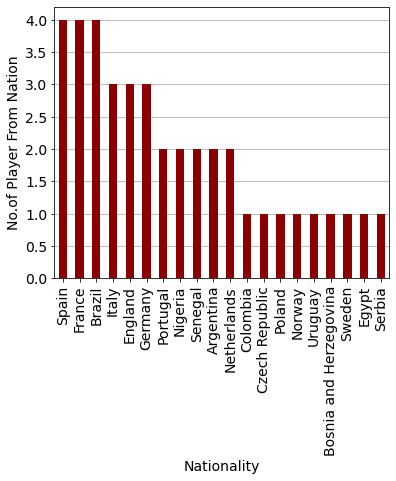

In [78]:
#See where the top scorers from the top four leagues in the world are mostly from
ax = nation_counts.plot(kind="bar", fontsize=14, figsize=(6,5), color="darkred", zorder=3)
plt.xlabel("Nationality", fontsize=14)
plt.ylabel("No.of Player From Nation", fontsize=14)
ax.yaxis.grid(True);
#We see countries with a big footballing background have the most players in the list 
#such as France.We also observe countries with a smaller footballing background, such 
#as Egypt, only have one player in the top scorers list being Mohamed Salah

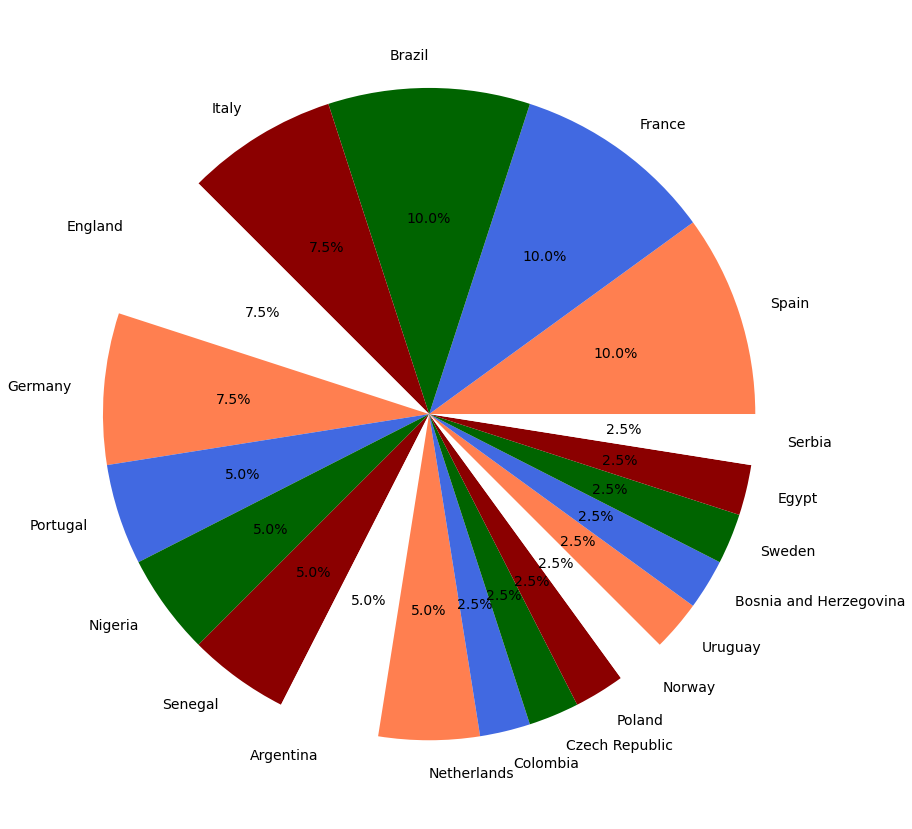

In [79]:
#Form a pie chart to see percentages of no. of top scorers from each country
ax = nation_counts.plot(kind="pie", figsize=(15, 15), fontsize=14, autopct="%.1f%%", 
                        colors=["coral", "royalblue", "darkgreen","darkred","white"])
ax.set_ylabel(None);
#The pie chart just gave a better visualisation of the percentages of the countries with the 
#most players in the top scorers list

In [80]:
#Total number of goals scored 
total_goals=df["League Goals"].sum()
total_goals

241

In [81]:
#Number of goals scored by every player from a certain nation
goals_per_nation=df.groupby("Nationality")
goals_per_nation.sum()

,League Goals
Nationality,
Argentina,13
Bosnia and Herzegovina,7
Brazil,22
Colombia,6
Czech Republic,8
Egypt,10
England,17
France,23
Germany,15


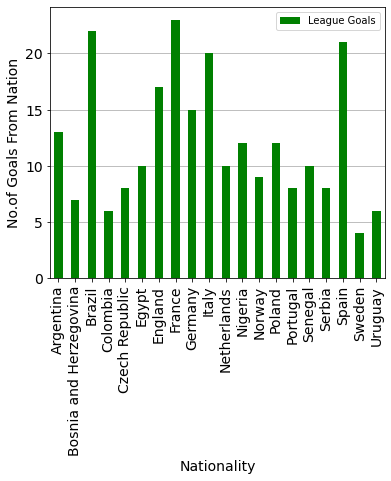

In [82]:
#See which nationalities are scoring the most goals in the list
ax = goals_per_nation.sum().plot(kind="bar", fontsize=14, figsize=(6,5), color="green", zorder=3)
plt.xlabel("Nationality", fontsize=14)
plt.ylabel("No.of Goals From Nation", fontsize=14)
ax.yaxis.grid(True);
#We see France Brazil and Spain have the most goals scored by their players in the list which 
#is expected when we see them at the top of the most players involved in the list.But then we 
#can see that Poland has more total goals than the Netherlands despite Poland having one less 
#player than Nigeria in the list which is very suprising to see.

In [83]:
#Getting the mean amount of goals for each country
#This seems to be a fairer representation of how many goals the players from
#each country are actually scoring
goals_per_nation.mean()

,League Goals
Nationality,
Argentina,6.500000
Bosnia and Herzegovina,7.000000
Brazil,5.500000
Colombia,6.000000
Czech Republic,8.000000
Egypt,10.000000
England,5.666667
France,5.750000
Germany,5.000000


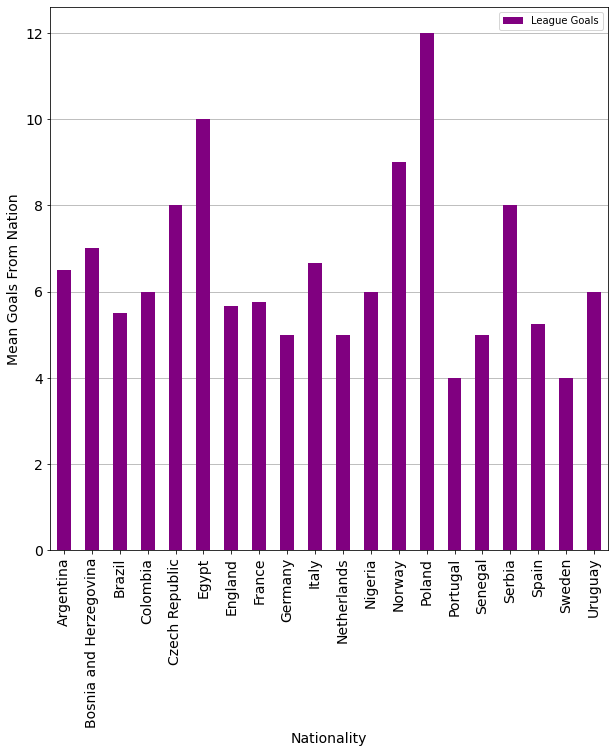

In [84]:
#See which nationalities are scoring the most goals in the list
ax = goals_per_nation.mean().plot(kind="bar", fontsize=14, figsize=(10,10), color="purple", zorder=3)
plt.xlabel("Nationality", fontsize=14)
plt.ylabel("Mean Goals From Nation", fontsize=14)
ax.yaxis.grid(True);
#The countries who were top of the previous lists did not feature at the top of this,because
#the scoring from the these countries were a lot more spread out while when we look at Poland
#again we can see that it was the one player who did all the scoring

In [85]:
#Counts the number of attackers,midfielders and defenders in the list
position_counts=df["Position"].value_counts()
position_counts
#It was obvious that the attackers would occupy most of the list
#and only a few midfielders could feature in the top scorers across
#the four leagues

Attacker      31
Midfielder     9
Name: Position, dtype: int64

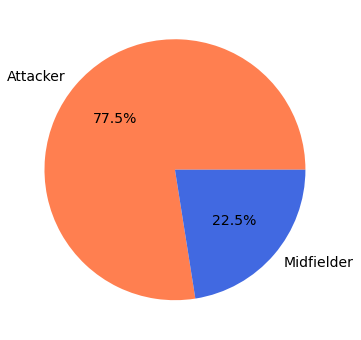

In [86]:
#Pie chart to show percentage of Attackers in list compared to Midfielders
ax = position_counts.plot(kind="pie", figsize=(6, 6), fontsize=14, autopct="%.1f%%", 
                        colors=["coral", "royalblue",])
ax.set_ylabel(None);

In [87]:
#Count how many players are from each team
team_counts=df["Team"].value_counts()
team_counts
#Seeing that top of the list with 4 Players is liverpool in not suprising 
#as they are a big club but i was suprised to see Bayer 04 Leverkusen in 
#second with 3 Players as they are a much smaller club than most of the list and the same goes
#for FC Internazionale Milano in third with 2 players

Liverpool FC                 4
Bayer 04 Leverkusen          3
FC Internazionale Milano     2
Manchester United FC         2
Real Betis Balompié          2
FC Bayern München            2
Real Madrid CF               2
West Ham United FC           1
1. FC Union Berlin           1
Borussia Dortmund            1
Club Atlético de Madrid      1
Atalanta BC                  1
ACF Fiorentina               1
Leicester City FC            1
SS Lazio                     1
AS Roma                      1
Villarreal CF                1
RB Leipzig                   1
Brighton & Hove Albion FC    1
Cagliari Calcio              1
SSC Napoli                   1
RCD Espanyol de Barcelona    1
1. FSV Mainz 05              1
Valencia CF                  1
Genoa CFC                    1
1. FC Köln                   1
FC Barcelona                 1
Hellas Verona FC             1
Watford FC                   1
Real Sociedad de Fútbol      1
Name: Team, dtype: int64

Text(0, 0.5, 'Team')

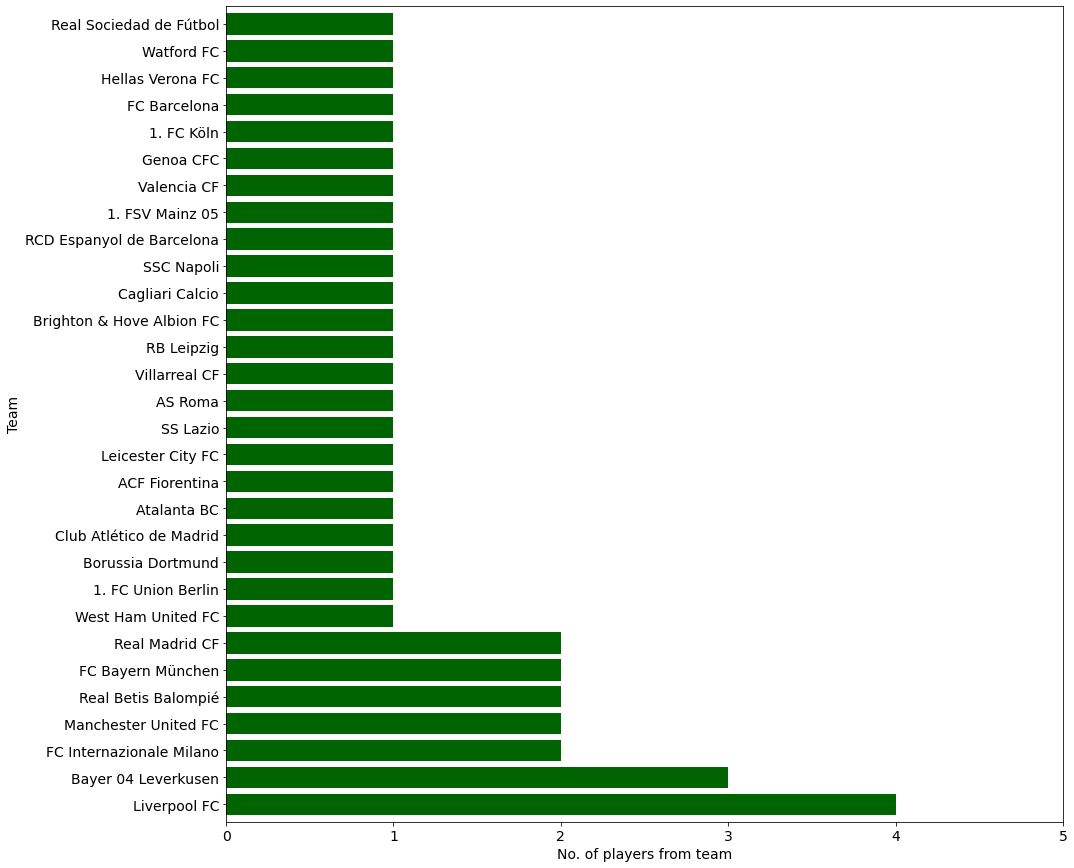

In [95]:
#Visualisation of team_counts
ax = team_counts.plot(kind="barh", figsize=(15, 15), fontsize=14, color="darkgreen", width=0.8)
ax.set_xlim((0,5))
ax.set_xlabel("No. of players from team", fontsize=14)
ax.set_ylabel("Team", fontsize=14)


In [ ]:
#To summarise the assignment, I would say that working with APIs was a 
#very enjoyable task. Between both the data collection task and the analysis task, I think
#I learned a lot of new skills such as using pandas, dataframes, creating visiual aids using
#pandas e.t.c.I picked the football API as i have a great interest in the sport and using the 
#API actually expanded my knowledge about the top goalscorers in the world at this moment in time
#I hope to use this API again along with another API and maybe analyse something different such as
#Seeing the win percentage for certain teams depending on weather conditions. 
